* XGBoost 버전 확인

In [1]:
import xgboost

print(xgboost.__version__)

1.7.3


* XGBoost는 GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있으며, 여기에 조기 중단, 과적합을 규제하기 위한 하이퍼 파라미터들이 추가됐습니다.

## 파이선 래퍼 XGBoost 하이퍼 파라미터

* 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미티 값을 바꾸는 경우는 거의 없습니다
* 부스터 파라미터 트리 최적화. 부스팅. regulanzation 등과 관련 파라미터 등을 지칭합니다.
* 학습 태스크 파라미터: 학습 수행 시의 객체 함수. 평가를 위한 지표 등을 설정하는 파라미터입니다.
대부분의 하이퍼 파라미터는 Booster 파라미터에 속합니다.

## 주요 일반 파라미터
* booster: gbtree(tree based mode) 또는 gblinear (linear mode) 선택,. 디폴트는 gbtree입니다.
* silent 디폴트는 0이며. 출력 메시지를 나타내고 싶지 않을 경우 1로 설정합니다.
* nthread: CPU의 실행 스레드 개수를 조정하며, 디폴트는 CPU의 전체 스레드를 다 사용하는 것입니다. 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경합니다.

## 주요 부스터 파라미터
* eta [defaul=0.3, alias: leamning_rate]: GBM의 학습률(learning rate)과 같은 파라미터입니다. 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값 파이썬 래퍼 기반의  XGBoost를 이용할 경우 디폴트는 0.3. 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, 디폴트는 0:1입니다. 보통은 0.01 ~0.2 사이의 값을 선호합니다.
* num_boost_rounds: GBM의 n_estimators와 같은 파라미터입니다.
* min_child_weight[defaut=1] 트리에서 추가적으로 가지를 나놀지를 결정하기 위해 필요한 데이터들의 weight 충합. min child_ weight이l 클수록 분할을 자제합니다. 과적합을 조절하기 위해 사용됩니다.
* gamma [default=0, alias: min_split_loss] 트리의 리프 노드를 추가적으로 나놀지를 결정할 최소 손실 감소 값입니다. 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리합니다. 값이 클수록 과적합 감소 효과가 있습니다.
* max_depth [default-6]: 트리 기반 알고리즘의 max_depth와 같습니다. 0을 지정하면 깊이에 제한이 없습니다. max_depth가 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용합니다.
* sub_sample [default:1]: GBM의 subsample과 동일합니다. 트리가 커저서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정합니다. sub sample-0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용합니다. 0에서1 사이의 값이 가능하나 일반적으로 0.5 ~1사이의 값을 사용합니다.
* colsample_bytreel[delault=1] GBM의 max_features와 유사합니다. 트리 생성에 필요한 피쳐(갈럼)를 임의로 샘플링하는 데 사용됩니다. 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용합니다.
* lambda [deault=1, alias: reg_lambda]: L2 Regularizalion 적용 값입니다. 피처 개수가 많을 경우 적용을 검토하며, 값이 클수록 과적합 감소 효과가 있습니다.
* alpha[deault=0, alias: reg_alpha] L1 Regularization 적용 값입니다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있습니다.
* scale_pos_weight [deault=1]: 특정 값으로 치우친 비대칭한 콜래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터입니다.

## 학습 태스크 파라미터
* objective: 최초값을 가지야 할 손실 함수를 정의합니다. XGBoost는 많은 유형의 손실함수를 사용할 수 있습니다. 주로 사용되는 손실향수는 이진 분류인지 다중 분류인지에 따라 달라집니다.
* binary:logistic: 이진 분류일 때 적용합니다.
* multi:softmax: 다중 분류일 때 적용합니다. 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class파라미터를 지정해야 합니다.
* multi:softprob: multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환합니다.
* eval_metric: 검증에 사용되는 함수를 정의합니다. 기본값은 회귀인 경우는 rmse, 분류일 경우에는 error입니다. 다음은 eval_metric의 값 유형입니다.
    * rmse: Root Mean Square Error
    * mae: Mean Absolute Error
    * logloss: Negative log-ikelhood
    * error: Binary classification error rate (0.5 threshold)
    * merror: Multiclass classification error rate
    * mlogloss: Multiclass logloss
    * auc: Area under the curve

## 과적합 문제가 심각하다면 다음과 같이 적용할 것을 고려할 수 있습니다.
* ela 값을 낮줍니다(0.01 ~ 0.1). ela 값을 낮출 경우 num_round(또는 n_esimatlors)는 반대로 높여줘야 합니다.
* max_depth 값을 낮줍니다.
* min_child_weight 값을 높입니다.
* gamma 값을 높입니다.
* 또한 subsample과 colsamole_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있습니다.

### 파이썬 래퍼 XGBoost 적용 – 위스콘신 유방암 예측

* 위스콘신 유방암 데이터 세트-종양의 크기,모양 등의 다양한 속성값을 기반으로 악성 종양인지 양성 종양인지를 분류한 데이터 세트

In [2]:
import xgboost as xgb
from xgboost import plot_importance#피쳐의 중요도를 시각화해주는 모듈
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()#위스콘신 유방암 데이터 세트를 불러오기 위해 호출
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [4]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
#XGBoost가 제공하는 검증 성능 평가와 조기 중단을 수정해보기 위해 검증용 데이터를 별도로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [5]:
#DMatrix-XGBoost만의 전용 데이터 객체-넘파이, DataFrame, Series, libsvm txt 포맷파일, xgboost 이진 버퍼 파일을기반으로 생성가능, 주요 입력파라미터는 data와 label
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [6]:
#XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력한다. 
params = { 'max_depth':3,                #트리 최대 깊이는 3
          'eta': 0.05,                   #학습률은 0.1/XBBClassifier를 사용할 경우 eta가 아니라 leaming_rae입니다
          'objective':'binary:logistic', #예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(birary:logistic).
          'eval_metric':'logloss'        #오류 함수의 평가 상능 지표는 logloss
         }
num_rounds = 400                         #부스팅 반목 횟수는 400회

In [7]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다. 
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , early_stopping_rounds=50, evals=eval_list )
#train()함수를 호출해서 학습 진행
#train()함수는 학습이 완료된 모델객체를 반환
#조기 중단할 수 있는 최소 반복 횟수 50

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

* 126번째 반복에서 logloss값이 가장 낮고 126번부터 176번까지 이보다 logloss값이 향상되지 않아 반복을 중단함

In [8]:
pred_probs = xgb_model.predict(dtest)#predict() 학습이 완료된 객체를 이용하여 예측을 수행하는 함수 - 예측 확률값을 반환
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9937


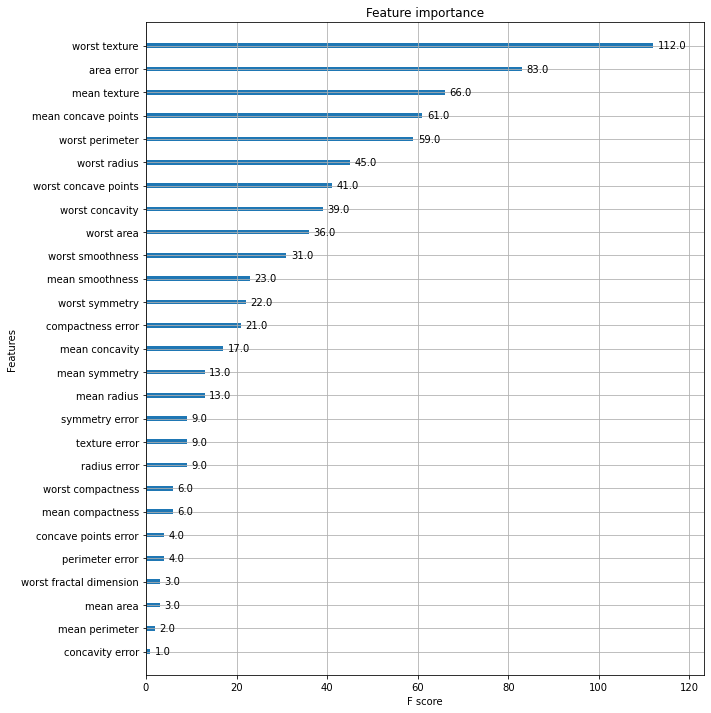

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
#피쳐의 중요도를 막대그래프 형식으로 나타냄
#기본 평가 지표로 f스코어(해당 피처가 트리 분할 시 얼마나 자주 사용되었는지)를 기반으로 해당 피처의 중요도를 나타냄
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

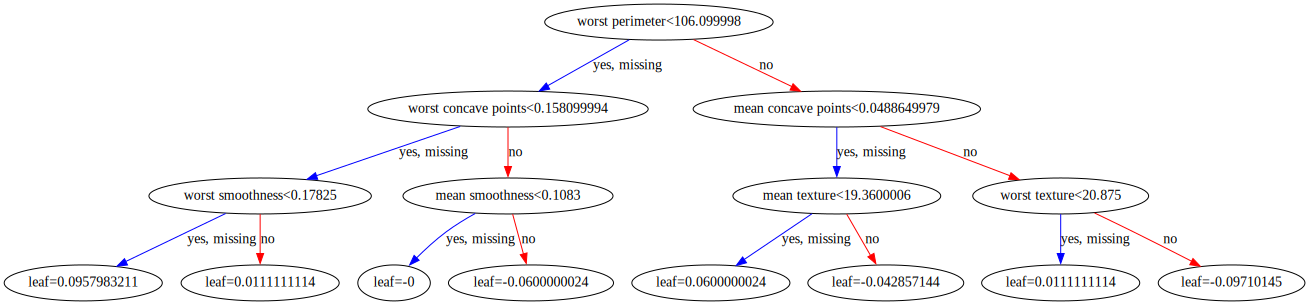

In [19]:
xgboost.to_graphviz(xgb_model)#xgboost모듈의 to_graphviz() API를 통해 규칙트리 구조를 그릴 수 있음.

* 파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv( ) API로 제공합니다. 다음은 Cv( ) API와 파라미터에 대한 설명입니다.

xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified-False, folds-None,metrics=(),
obj=None, feval=one, maximize=False, early_stopping_rounds=None, fpreproc=None,as_bandas=True,
           verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

* params (dict): 부스터 파라미터
* dtrain (DMatrix): 학습 데이터
* num_boost_round (int): 부스팅 반복 횟수
* nfold (int): CV 폴드 개수
* stratified (bool): CV 수행 시 층화 표본 추출(straltified sampling) 수행 여부
* metrics (string or list of strings): CV 수행 시 모니터링할 성능 평가 지표
* early_stopping_rounds (int): 조기 중단을 활성화시킴! 반복 횟수 지정.

### 사이킷런 래퍼 XGBoost의 개요 및 적용

사이킷런의 기본 Estimator를 그대로 상속해 만들었기 때문에 다른 Estimator와 동일하게 fit( )과 predict( )만으로 학습과 예측이 가능하고
GridSearchcv, Pipeline 등 사이깃런의 다른 유틸리티를 그대로 사용할 수 있기 때문에 기존의 다른 머신러닝 알고리즘으로 만들어놓은 프로그램이 있더라도 알고리즘 클래스만 XGBoost 래퍼 클래스로 바꾸면 기존 프로그램을 그대로 사용할 수 있습니다. 

사이킷런을 위한 래퍼 XGBoost는 크게 분류를위한 래퍼 클래스인 XGBClassitfier, 회귀를 위한 래퍼 클래스인 XGBRegressor입니다.
파이썬 래퍼 XGB00s와 사이킷런 래퍼 XGB00s의 하이퍼 파라미터에 약간의 차이가 있다고 앞에서

XGBClassitfier는 기존 사이깃런에서 일반적으로 사용하는 하이퍼 파라미터와 호환성을 유지하기 위해 기존의 xgboost 모듈에서 사용하던 네이티브 하이퍼 파라미터 몇개를 다음과 같이 변경했습니다.
* eta -> learning_rate
* sub_sample -> subsample
* lambda -> reg_lambda
* alpha -> reg_alpha

In [12]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier
#XGBClassifier클래스의 fit(), predict(), predict_proba()를 이용해 학습과 예측을 수행
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [13]:
get_clf_eval(y_test , w_preds, w_pred_proba)#성능 평가

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [14]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)#조기 중단 관련 파라미터는 fit()에 입력하면 된다.

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [15]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [16]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

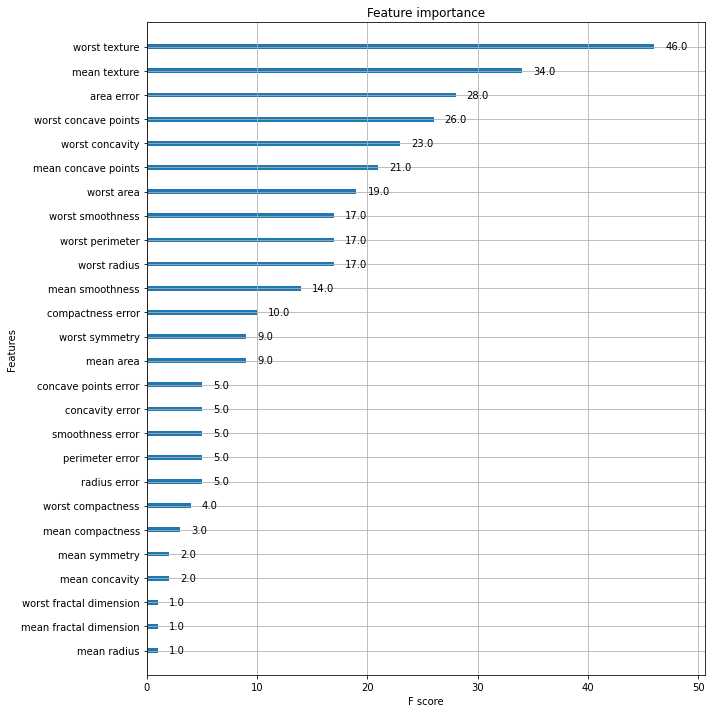

In [17]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)
